# Annotationen auswerten mit GitMA 3

Wir wenden uns nun der Erstellung eines Goldstandards für Annotationen zu, die Sie in CATMA erstellt haben. Diese Daten erstellen Sie zunächst lokal auf Ihrem Computer, können Sie dann aber zurück in die CATMA-Webapplikation laden.

Dieser dritte Teil der forTEXT-Lerneinheit "CATMA-Annotationen auswerten, Gold Standard erstellen und Inter-Annotator-Agreement berechnen mit GitMA" nutzt wieder ein von uns erstelltes Beispielprojekt. Wie Sie eigene CATMA-Daten auf Ihren Computer herunterladen können, zeigen wir Ihnen im ersten Teil dieser Lerneinheit, dem Notebook mit dem Dateinamen "Annotationen auswerten mit GitMA 1".

## Inhalt
* [1. Einführung](#1-bullet)
* [2. CATMA-Projekt laden](#2-bullet)
* [3. Gold Annotationen automatisch erstellen](#3-bullet)

## 1. Einführung <a class="anchor" id="1-bullet"></a>

Um Goldannotationen zu erstellen, kann mit GitMA eine Kopie aller übereinstimmenden Annotationen von zwei Annotator:innen erstellt werden. Diese übereinstimmenden Annotationen werden in einer (neuen) Gold Annotation Collection abgelegt. Diese neue Annotation Collection können Sie über Git wieder in CATMA hochladen, wo Sie sie dann wie gewohnt bearbeiten können, d.h. Sie können hier Annotationen hinzufügen und die automatisch erstellten Gold Annotationen überarbeiten. 

In CATMA können Sie ganz frei und undogmatisch annotieren, was dazu führt, dass Annotationsspannen stark variieren können. Bei der Erstellung eines Goldstandards mit GitMA kann darum flexibel angepasst werden, was als Übereinstimmung gewertet werden soll. 

Um die erstellten Annotationsdaten automatisch in die CATMA-Webapp hochladen zu können, müssen Sie dort in Ihrem Projekt bereits eine neue Annotation Collection angelegt haben, z.B. "Gold_Annotation".

## 2. CATMA-Projekt laden <a class="anchor" id="2-bullet"></a>

Wenn Sie Teil 2 dieser Lerneinheit bereits durchgeführt haben, wissen Sie schon, dass Sie das CATMA-Projekt, mit dem Sie arbeiten wollen, immer zuerst laden müssen. Um das zu tun, klicken Sie in unten stehende Zeile und dann oben im Menü auf "Run". Ist die Code-Zeile ausgeführt, so wird automatisch die nächste Zeile ausgewählt. Sie können nun also einfach wieder auf "Run" klicken und die zweite Funktion wird ausgeführt. Danach ist das CATMA-Demo-Projekt geladen. Wenn Sie mit eigenen Daten arbeiten wollen, so ersetzen Sie in der zweiten Code-Zeile "../test/demo_project" durch den Dateipfad, der zu Ihrem CATMA-Projekt führt.

<div class="alert alert-block alert-info">
    <b>Achtung!</b> Sie müssen hier nur den Dateipfad zu dem übergeordneten Ordner einfügen, in dem Ihr Projekt liegt. Das Projekt selbst hat einen Namen, der diesem ähnelt: CATMA_374270D5-006D-498D-BDB4-12D068DEFDC0_Projektname_root. Sie müssen hier aber eine Ebene darüber in Ihrem Ordnersystem angeben. 
</div>

Geben Sie außerdem den Projektnamen (nicht den Namen des Projektordners) dort ein, wo jetzt "test_corpus" steht.

In [ ]:
from gitma import CatmaProject

In [ ]:
my_project = CatmaProject(
    project_directory='../test/demo_project/',
    project_name='test_corpus'
)

Wie Sie sehen, wird dabei auch die leere Annotation Collection geladen, die in CATMA für die Gold-Annotationen angelegt wurde.

## 3. Gold Annotationen automatisch erstellen <a class="anchor" id="3-bullet"></a>

Um eine Goldstandard-Annotation zu erstellen, müssen Sie im ersten Schritt zwei Annotationen vergleichen und im zweiten nur diejenigen Annotationen behalten, die übereinstimmend annotiert wurden. Im Demo-Projekt dieser Lerneinheit gibt es zwei Annotation Collections, die "ac_1" und "ac_2" genannt wurden. Außerdem gibt es die leere Annotation Collection namens "gold_annotations". Als Übereinstimmung werden hier Annotationen gewertet, die sich zu mindestens 95% überlappen. Eine Annotation kann also z.B. etwas länger sein als die andere oder einen leicht anderen Start- und Endpunkt haben. Die genutzten Annotationskategorien (Tags) müssen die gleichen sein und die Propertys müssen gleich vergeben worden sein. Um die Funktion mit den Demo-Daten auszuprobieren, wählen Sie einfach  die nächste Code-Box aus, indem Sie hineinklicken. Gehen Sie dann oben im Menü auf "Run".

Wenn Sie mit eigenen Daten arbeiten, so müssen Sie die Namen der Annotation Collections durch diejenigen ersetzen, die Sie in Ihrem Projekt verwenden. Achten Sie dabei auf die exakte Schreibweise! Sie können bestimmte Tags bei der Erstellung einer Goldstandard-Annotation ausschließen. Geben Sie dazu die Namen der Tags in die eckigen Klammern hinter "excludet_tags=" ein. Setzen Sie jeden Tagnamen in einfache Anführungsstriche und trennen Sie die einzelnen Tags mit Kommas voneinander. Wenn Sie die Definition übereinstimmender Annotationen anpassen möchten, geben Sie statt der 0,95 bei "min_overlap" einen anderen Wert ein. Möglich sind hier Werte von 0-1, wobei 0 für keinerlei Überlappung steht und darum hier kein sinnvoller Wert wäre und 1 für eine 100%
-ige Überlappung. Möchten Sie auch Annotationen als übereinstimmend werten, bei denen zwar dieselbe Textpassage annotiert wurde, nicht aber mit demselben Tag, so geben Sie statt "same_tag=TRUE" "same_tag=FALSE" ein. Bei "property_values" können Sie statt "matching" auch "none" eingeben. In diesem Fall werden Property Values nicht in die Erstellung der Goldstandard-Annotationen einbezogen. Wenn Sie eine automatisch erstellte Goldstandard-Annotation über Gitlab in Ihr CATMA-Projekt hochladen wollen (dies geht nur mit eigenen CATMA-Daten), so geben Sie "TRUE" bei "push_to_gitlab" ein. 

In [ ]:
my_project.create_gold_annotations(
    ac_1_name='ac_1',               
    ac_2_name='ac_2',               
    gold_ac_name='gold_annotation',
    excluded_tags=[],
    min_overlap=0.95,               
    same_tag=True,
    property_values='matching',     
    push_to_gitlab=False           
)

Wie Sie sehen, bekommen Sie einen kurzen Report über den Vergleich der Annotation Collections und die neu erstellten Annotationen.

<div class="alert alert-block alert-info">
    <b>Aufgabe 7</b> Wie viele Annotationen wurden jeweils in den Annotation Collections gefunden und wie viele davon stimmen nicht zu 95% überein? 
</div>

Wenn Sie mit eigenen Daten arbeiten und die Goldstandard-Annotationen automatisch per GitLab in Ihren CATMA-Account hochgeladen haben, so müssen Sie Ihr CATMA-Projekt noch synchronisieren, damit die Änderungen dort sichtbar werden. Loggen Sie sich dazu in Ihren CATMA-Account ein und gehen Sie in Ihr Projekt. Klicken Sie rechts auf das Drei-Punkte-Menü und dann auf "Synchronize with the team" (vgl. Abb. 1). Ihre Änderungen werden sichtbar sein, sobald der Vorgang abgeschlossen ist.
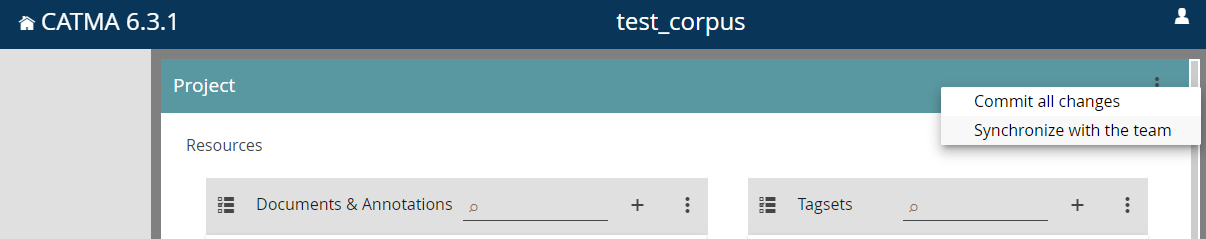
**Abb. 1: CATMA-Projekt synchronisieren** 

Sie wissen nun, wie Sie einen Goldstandard für übereinstimmende Annotationen errechnen und erstellen lassen können und diesen auch zurück in Ihr CATMA-Projekt laden. Vielleicht möchten Sie die Übereinstimmungen bei der Annotation in Ihrem Projekt aber viel genauer analysieren. Dabei helfen Berechnungen des Inter-Annotator-Agreements. Wie Sie diese mit CATMA-Daten durchführen, lernen Sie im vierten Teil dieser Lerneinheit. Öffnen Sie dazu nun das Notebook mit dem Titel "Annotationen auswerten mit GitMA 4".